# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [46]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [47]:
values = list(range(1, 13))

a = torch.reshape(torch.FloatTensor(values), (3,4))
b = torch.reshape(torch.FloatTensor(values), (12,))
c = b.view(2,2,3)
print(f'a: {a}\n')
print(f'b: {b}\n')
print(f'c: {c}\n')
print(f'first column of a: {a[:, 0]}\n')


a: tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

b: tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

c: tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[ 7.,  8.,  9.],
         [10., 11., 12.]]])

first column of a: tensor([1., 5., 9.])



### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [48]:
values = list(range(1, 11))

a = torch.reshape(torch.FloatTensor(values), (5,2))
b = torch.reshape(torch.FloatTensor(values), (1,10))
c = b.view(5,2)
print(f'a: {a}\n')
print(f'c: {c}\n')
print(f'a + c: {a + c}\n')
print(f'a - c: {a - c}\n')
print(f'a * c: {a * c}\n')
print(f'a / c: {a / c}\n')
print(f'a ^ c: {a ** c}\n')

a: tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

c: tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

a + c: tensor([[ 2.,  4.],
        [ 6.,  8.],
        [10., 12.],
        [14., 16.],
        [18., 20.]])

a - c: tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

a * c: tensor([[  1.,   4.],
        [  9.,  16.],
        [ 25.,  36.],
        [ 49.,  64.],
        [ 81., 100.]])

a / c: tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

a ^ c: tensor([[1.0000e+00, 4.0000e+00],
        [2.7000e+01, 2.5600e+02],
        [3.1250e+03, 4.6656e+04],
        [8.2354e+05, 1.6777e+07],
        [3.8742e+08, 1.0000e+10]])



### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [49]:
def plot_image(image, label=None):
    if label is not None:
        print(f'{label}:')
    plt.imshow(image, cmap='gray')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0:


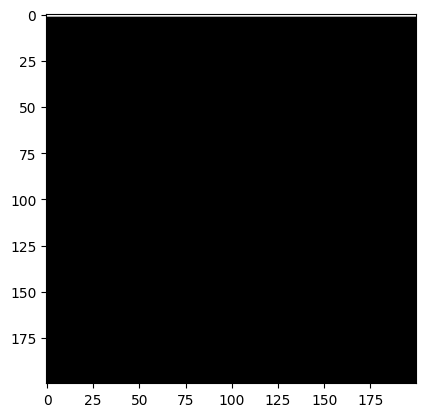

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


25:


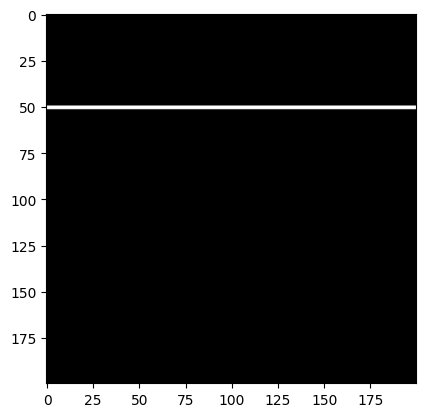

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


50:


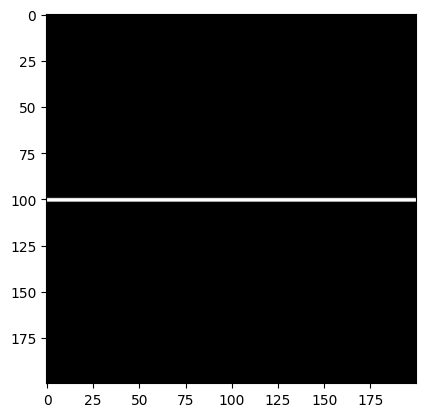

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


75:


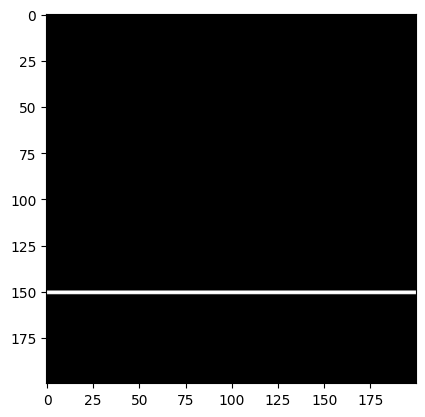

In [50]:
# Видимо имелось ввиду, что у 3 по индексу(а не по порядку) картинки строки
# 6 и 7 белые, иначе для последней картинки не останется строк.

# 1
images = torch.zeros((100,200,200,3))

from matplotlib import pyplot as plt
import numpy as np

# 2
for i in range(images.shape[0]):
    images[i][i*2:i*2+2] = 255

for i in range(0, 100, 25):
    # image = np.array(image, dtype='float')
    plot_image(images[i], i)

mean image:


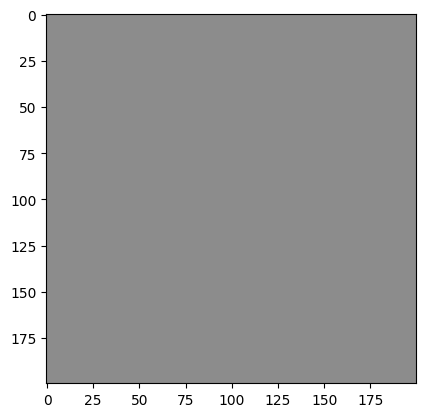

In [55]:
# 3
mean_image = torch.mean(images.float(), 0).int() * 70
plot_image(mean_image, 'mean image')

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [77]:
a = torch.empty((2, 3, 4)).uniform_()
b = torch.empty((1, 8, 3)).uniform_()
# a = torch.empty((2, 3, 4), device='cuda').uniform_() # запускал локально, не настраивал cuda
# b = torch.empty((1, 8, 3), device='cuda').uniform_()

c = b.view(2, 3, 4)

c = c.cpu()
a = a.cpu()

c = torch.autograd.Variable(c, requires_grad=True)
a = torch.autograd.Variable(a, requires_grad=True)

L = torch.mean((c - a) ** 2)
L.backward()

print(c.grad)

tensor([[[ 0.0257, -0.0436,  0.0337,  0.0456],
         [-0.0008, -0.0521,  0.0249,  0.0227],
         [-0.0078,  0.0367, -0.0436,  0.0097]],

        [[ 0.0391,  0.0673,  0.0602,  0.0247],
         [ 0.0213,  0.0059, -0.0127, -0.0166],
         [ 0.0079,  0.0553, -0.0094,  0.0577]]])
